In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Definir o caminho do arquivo
file_path = r'C:\Users\Jesuino\Downloads\teste-25\data\nafld1.csv'

# Carregar o conjunto de dados
df = pd.read_csv(file_path)

In [5]:
# Selecionar as colunas relevantes para X e y
X = df[['age', 'male', 'weight', 'height', 'bmi']]
y = df['status']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.impute import SimpleImputer

# Inicializar o imputer para preencher valores ausentes com a mediana das colunas
imputer = SimpleImputer(strategy='median')

# Ajustar o imputer nos dados de treino e transformá-los
X_train = imputer.fit_transform(X_train)

# Transformar os dados de teste
X_test = imputer.transform(X_test)

In [7]:
# Inicializar o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo nos dados de treino
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

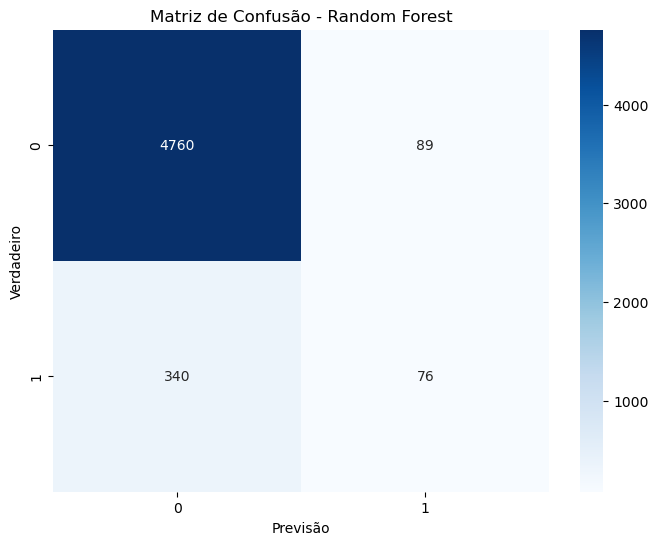

Acurácia (Random Forest): 0.9185185185185185
Precisão (Random Forest): 0.46060606060606063
Recall (Random Forest): 0.18269230769230768
F1-score (Random Forest): 0.26161790017211706


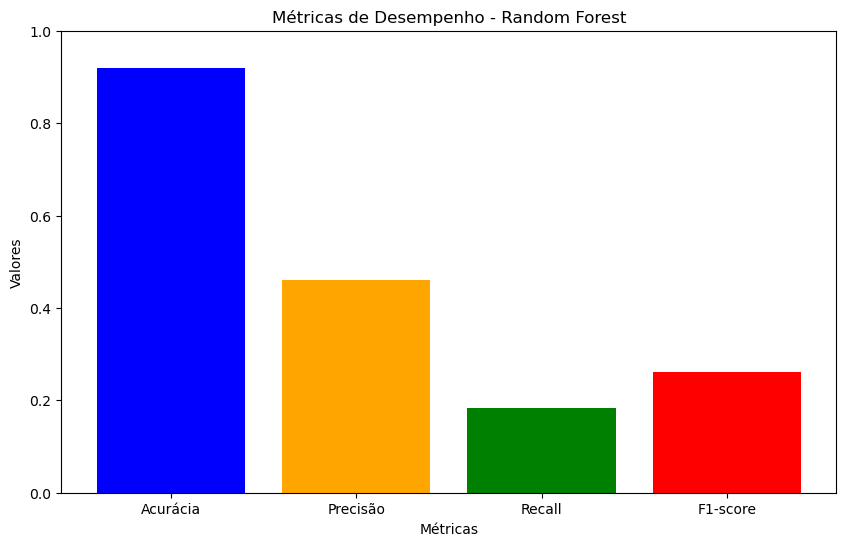

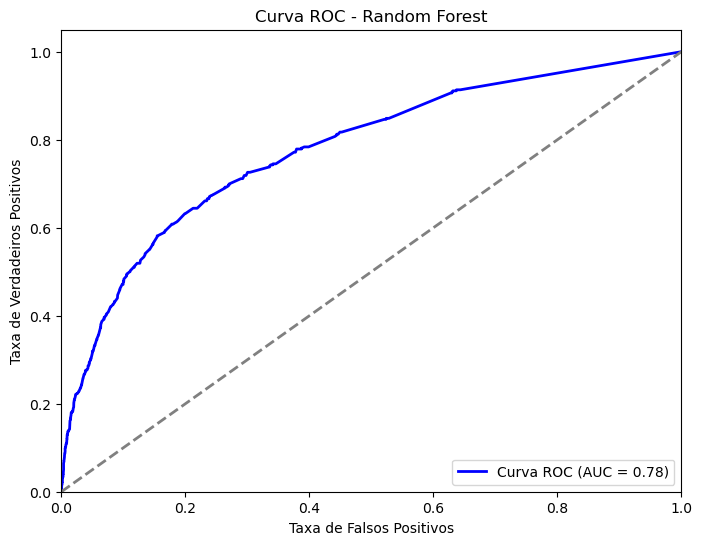

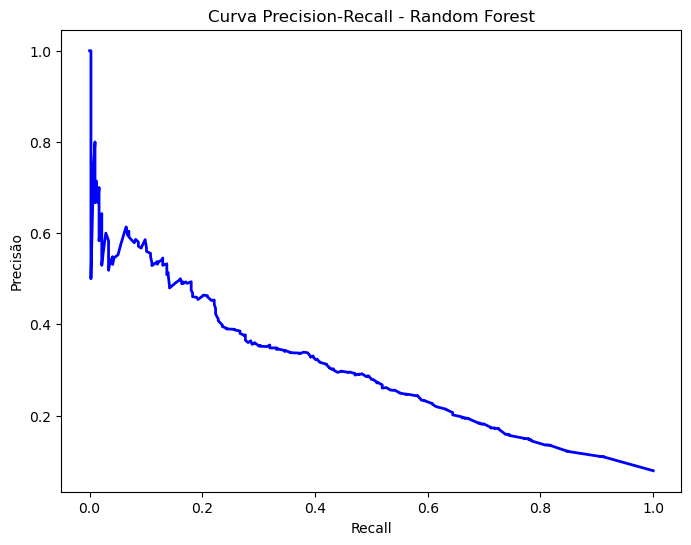

In [8]:
# Fazer previsões nos dados de teste
y_pred_rf = rf_model.predict(X_test)

# Calcular a Matriz de Confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# Calcular as Métricas de Desempenho
acurácia_rf = accuracy_score(y_test, y_pred_rf)
precisão_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Exibir Métricas de Desempenho
print(f"Acurácia (Random Forest): {acurácia_rf}")
print(f"Precisão (Random Forest): {precisão_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1-score (Random Forest): {f1_rf}")

# Gráfico de Barras para as Métricas de Desempenho
metrics_rf = {'Acurácia': acurácia_rf, 'Precisão': precisão_rf,
              'Recall': recall_rf, 'F1-score': f1_rf}
plt.figure(figsize=(10, 6))
plt.bar(metrics_rf.keys(), metrics_rf.values(),
        color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Métricas de Desempenho - Random Forest')
plt.ylim(0, 1)
plt.show()

# Curva ROC
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2,
         label=f'Curva ROC (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Curva Precision-Recall
precisions_rf, recalls_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(recalls_rf, precisions_rf, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall - Random Forest')
plt.show()